In [119]:
import pandas as pd

In [120]:
df = pd.read_csv('boston.csv')
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [121]:
print(df.isnull().sum())

# Заполнение пропущенных данных медианой
df.fillna(df.median(), inplace=True)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Все признаки имеют числовое значение, полей без данных нет.

In [122]:
# 4.  Посчитайте коэффициент  корреляции  для  всех  пар  признаков.  Подсказка: 
# воспользуйтесь  методом  corr() для  датафрейма,  чтобы  получить  сразу  всю 
# корреляционную матрицу. 
# Вычисление корреляции
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


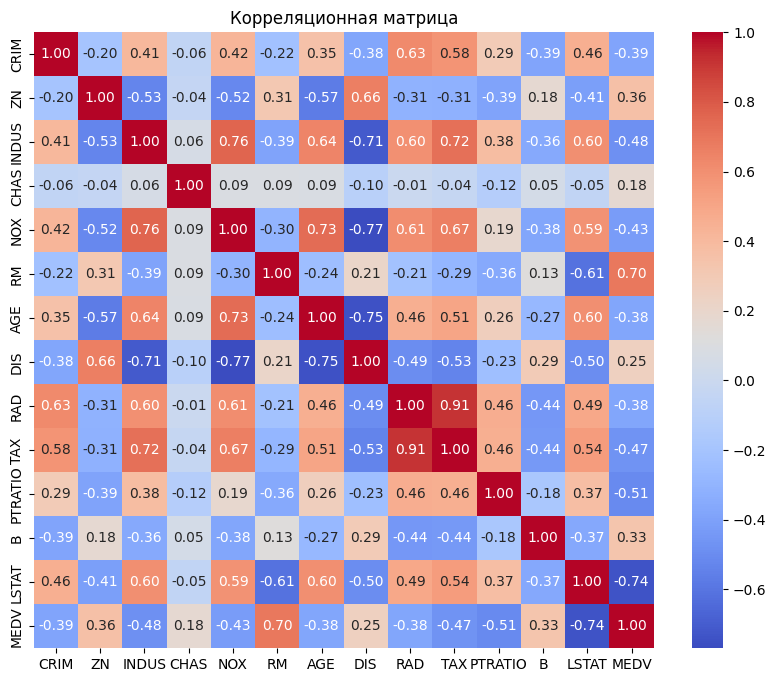

In [123]:
# 5. Построение тепловой карты: Используем библиотеку seaborn для построения тепловой карты корреляции.
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()


In [124]:
# Выбор признаков с наибольшей корреляцией с целевым признаком

# Сортировка по корреляции с MEDV
correlation_with_target = correlation_matrix['MEDV'].abs().sort_values(ascending=False)

# Выбираем 4-6 наиболее скоррелированных признаков
selected_features = correlation_with_target.index[1:7]
selected_features

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX'], dtype='object')

Выбранные признаки:
- LSTAT;
- RM;
- PTRATIO; 
- INDUS; 
- TAX; 
- NOX

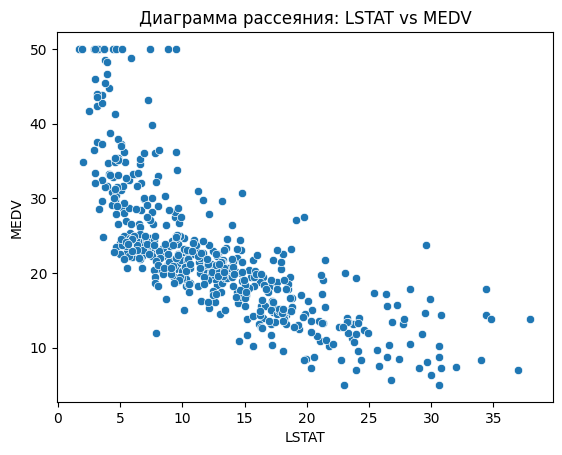

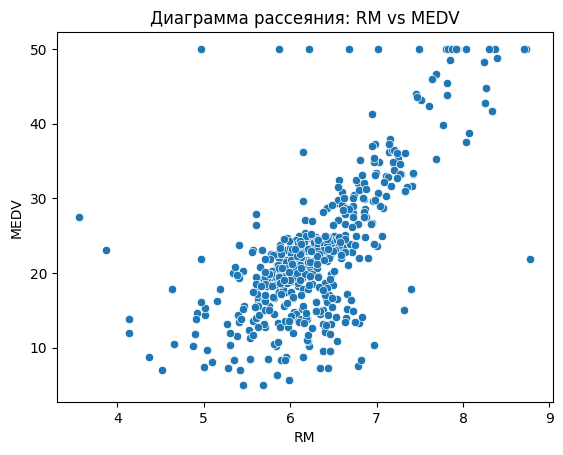

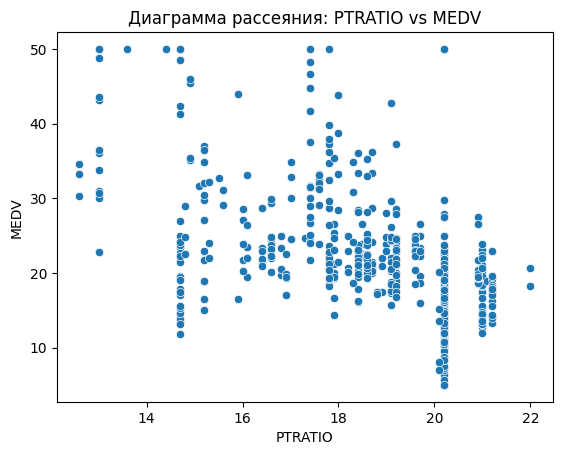

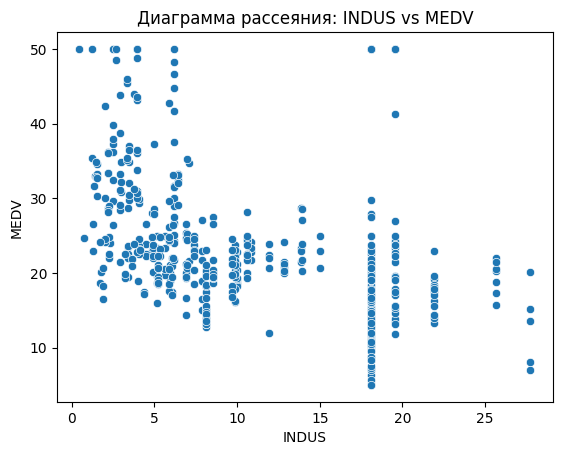

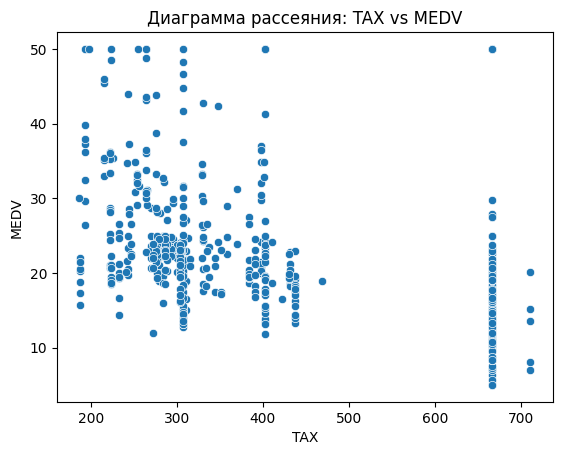

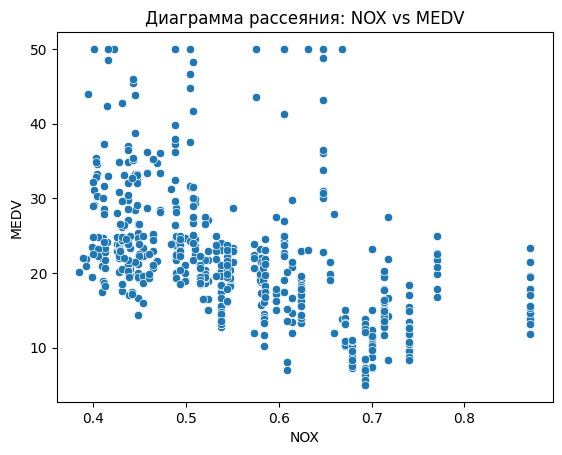

In [125]:
# 7. Построение точечных диаграмм

for feature in selected_features:
    sns.scatterplot(data=df, x=feature, y='MEDV')
    plt.title(f"Диаграмма рассеяния: {feature} vs MEDV")
    plt.show()

In [126]:
selected_features

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX'], dtype='object')

In [127]:
# Для дальнейшей работы выберем признаки LSTAT, RM, PTRatio
selected_features = pd.Index(['LSTAT', 'RM', 'PTRATIO'])
selected_features

Index(['LSTAT', 'RM', 'PTRATIO'], dtype='object')

In [128]:
# Формирование факторных признаков и целевой переменной
X = df[selected_features]
y = df['MEDV']


In [129]:
# 10. Выполните  разбиение  датасета  на  обучающую  и  тестовую  выборки  в 
# соотношении 8:2. При формировании обучающей и тестовой выборок строки из 
# исходного  датафрейма  должны  выбираться  в  случайном  порядке.  Подсказка: 
# можно  воспользоваться  функцией  train_test_split  из  библиотеки 
# sklearn.model_selection.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# 11. Обучение линейной регрессии
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [131]:
# Прогнозирование и оценка модели

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Прогноз на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка на обучающей выборке
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Оценка на тестовой выборке
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R² (Train): {r2_train:.2f}, RMSE (Train): {rmse_train:.2f}")
print(f"R² (Test): {r2_test:.2f}, RMSE (Test): {rmse_test:.2f}")


R² (Train): 0.69, RMSE (Train): 5.22
R² (Test): 0.63, RMSE (Test): 5.21


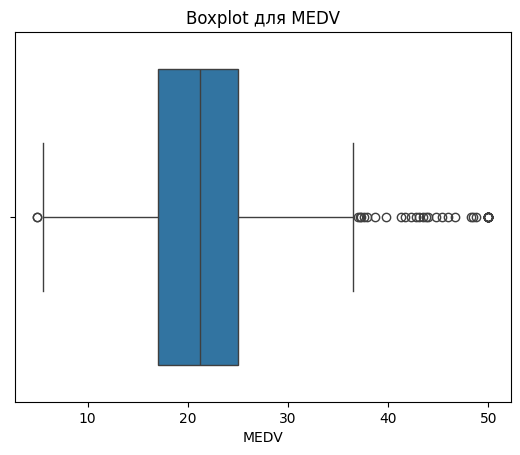

In [132]:
# Построение boxplot для целевого признака
sns.boxplot(x=df['MEDV'])
plt.title("Boxplot для MEDV")
plt.show()


In [133]:
# Удаление выбросов и переобучение модели
df_filtered = df[df['MEDV'] < 50]
X_filtered = df_filtered[selected_features]
y_filtered = df_filtered['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R² (обучение) без выбросов: {r2_train:.2f}, RMSE (обучение) без выбросов: {rmse_train:.2f}")
print(f"R² (тест) без выбросов: {r2_test:.2f}, RMSE (тест) без выбросов: {rmse_test:.2f}")


R² (обучение) без выбросов: 0.72, RMSE (обучение) без выбросов: 4.25
R² (тест) без выбросов: 0.67, RMSE (тест) без выбросов: 4.08


После удаления выбросов R² увеличился, при этом корень из среднеквадратичной ошибки уменьшился, что может означать:
- R² увеличился, модель стала лучше объяснять вариацию целевой переменной, качество модели увеличилось
- RMSE уменьшился - модель меньше ошибается в предсказаниях

In [134]:
# Гребневая регрессия
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R² (обучение) гребневая регрессия: {r2_train:.2f}, RMSE (обучение) гребневая регрессия: {rmse_train:.2f}")
print(f"R² (тест) гребневая регрессия: {r2_test:.2f}, RMSE (тест) гребневая регрессия: {rmse_test:.2f}")


R² (обучение) гребневая регрессия: 0.72, RMSE (обучение) гребневая регрессия: 4.25
R² (тест) гребневая регрессия: 0.67, RMSE (тест) гребневая регрессия: 4.08


In [135]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
y_test_poly_pred = poly_model.predict(X_test_poly)

r2_test_poly = r2_score(y_test, y_test_poly_pred)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))

print(f"R² (тест) полиномиальная регрессия: {r2_test_poly:.2f}, RMSE (тест) полиномиальная регрессия: {rmse_test_poly:.2f}")


R² (тест) полиномиальная регрессия: 0.80, RMSE (тест) полиномиальная регрессия: 3.20


Соберём информацию по всем моделям:

- Линейная модель с выбросами:
    R² (Test): 0.63, RMSE (Test): 5.21
- Линейная модель без выбросов:
    R² (тест) без выбросов: 0.67, RMSE (тест) без выбросов: 4.08
- Гребнеевая регрессия:
    R² (тест) гребневая регрессия: 0.67, RMSE (тест) гребневая регрессия: 4.08
- Полиномиальная регрессия:
    R² (тест) полиномиальная регрессия: 0.80, RMSE (тест) полиномиальная регрессия: 3.20
    
*Линейная модель, учитывающая выбросы данных*, показывает худший результат предсказания, коэффициент детерминации (R²) составляет 63% (модель объясняет всего 63% значений)

*Линейная модель, из обучающих и тестирующих данных которой исключили выбросы*, показало результат лучше, чем с выбросами, и, как и модель *гребнеевой регрессии*, показала коэффициент детерминации в 67%.

Лучший результат показала *полиномиальная регрессия* с коэффициентом детерминации в 80% и среднеквадратичным отклонением в 3.20 - модель реже ошибается.
Это свидетельствует о полиномиальной природе исходных данных.